<a href="https://colab.research.google.com/github/sandrofab/Covid-X-ray/blob/master/deep_learning_cv/autoencoder_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import keras
from keras import layers

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#aggiunta di noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
cv2_imshow(x_train_noisy[0]*255)

In [ ]:
#plot di alcuni dati con rumore
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#moedello autoencoder
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.callbacks import TensorBoard


In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.2530 - val_loss: 0.1168
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1158 - val_loss: 0.1098
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1096 - val_loss: 0.1059
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1060 - val_loss: 0.1034
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1038 - val_loss: 0.1015
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1022 - val_loss: 0.1004
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1009 - val_loss: 0.1000
Epoch 8/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1002 - val_loss: 0.0992
Epoch 9/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0994 - val_loss: 0.0984
Epoch 10/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0987 - val_lo

In [ ]:
x_test_noisy[1].shape

(28, 28, 1)

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy[1])

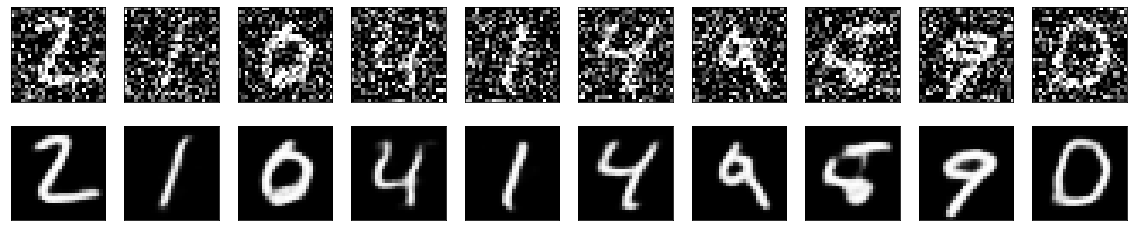

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


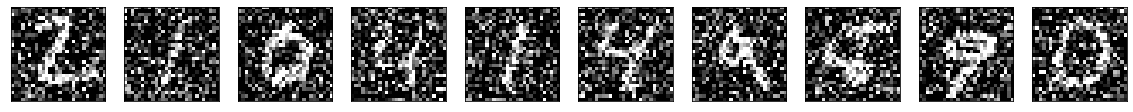

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()